# Notes from FORECASTING
Notes from [**Forecasting: Principles and Practice**](https://otexts.com/fpp2/). As a practice to help retain information
learned and for later reference, I am re-recording notes that I take along the way while reading this text.

## [1 Getting Started](https://otexts.com/fpp2/intro.html)  

### [1.6 Basic Steps](https://otexts.com/fpp2/basic-steps.html)  
1. Define the problem  
2. Gather information  
3. Preliminary (exploratory) analysis  
4. Choosing and fitting models  
5. Using and evaluating a forecasting model  

### [1.8 exercises](https://otexts.com/fpp2/intro-exercises.html)  
1. List possible predictions that might be useful assuming data is available.  
   Case 3: A large fleet of cars, forecast re-sale value  
   > historic car sales with model, mileage, year, year sold, condition  

   Case 4: forecasting weekly air passenger traffic  
   > historic traffic by day of week, month of year  

2. For case 3, describe the five steps of forecasting in the contect of this project.  
   > Step 1: forecast re-sale value of cars  
   > Step 2: gather historic used car sales data (price, mileage, date, etc.)  
   > Step 3: look at the data, graph it, look for patterns  
   > Step 4: decide on a model to use and fit the model to the data, make sure to train/test spilt  
   > Step 5: evaluate the model accuracy, use for predictions  

## [2 Time Series Graphics](https://otexts.com/fpp2/graphics.html)  
The first thing to do in any data analysis task is to plot the data.  
**Note:** I will be translating *R* code and plots into
_python_.

### [2.1 `ts` objects (in `pandas`)](https://otexts.com/fpp2/ts-objects.html)  
A `ts` object is a list of numbers associated with specific times.

| Year | Observation|
|---|---|
|2012 | 123|
|2013 | 39|
|2014 | 78|
|2015 | 52|
|2016 | 110|

**Note:** `pandas` `datetime` object resolution is to the _day_ and smaller. To show only _year_ we call `.year` on the index which can change how we interact with the series later.

In [5]:
import pandas as pd

data = [123, 39, 78, 52, 110]
idx = pd.date_range(start='2012', periods=len(data), freq='A')
pd.Series(data, index=idx.year)

2012    123
2013     39
2014     78
2015     52
2016    110
dtype: int64

frequency aliases of times series are  

frequency | code
---|---
Annual (year end) | 'A'
Quarterly (quarter end) | 'Q'
Monthly (month end) | 'M'
Weekly | 'W'

a full list of `pandas` aliases can be found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)

### [2.2 Time Plots](https://otexts.com/fpp2/time-plots.html)  
Track data over time

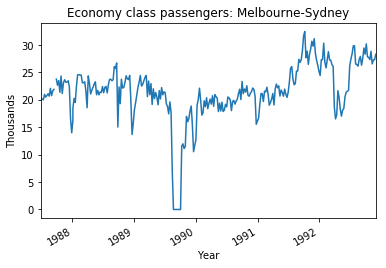

In [14]:
%matplotlib inline
import pandas as pd

melsyd = pd.read_csv('fpp2-data/data/melsyd.csv')
melsyd.index = pd.to_datetime(melsyd['index']+ ' 1', format="%Y W%W %w")
melsyd = melsyd.drop(columns=['index'])
ax = melsyd['Economy.Class'].plot(
    title='Economy class passengers: Melbourne-Sydney',
).set(ylabel='Thousands', xlabel='Year')

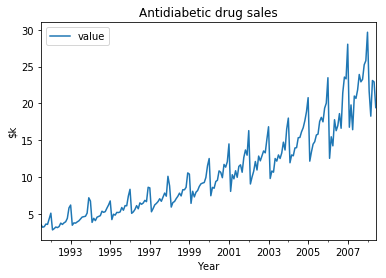

In [16]:
a10 = pd.read_csv('fpp2-data/data/a10.csv', index_col='index', parse_dates=['index'], infer_datetime_format=True)
a10.plot(title='Antidiabetic drug sales').set(xlabel='Year', ylabel='$k');

### [2.3 Time Series Patterns](https://otexts.com/fpp2/tspatterns.html)
* **trend** - long-term increase or decrease in the data
* **seasonal** - fixed and known, repeating pattern over the same time such as time of year, week, month, etc.
* **cyclic** - data that rises and falls with no fixed frequency


### [2.4 Seasonal Plots](https://otexts.com/fpp2/seasonal-plots.html)  
* overlay seasonal patterns on top of each other to see other trends
* polar coordinates can be useful for this as well

### [2.5 Seasonal subseries plots](https://otexts.com/fpp2/seasonal-subseries-plots.html)  
* subseries could be all annual date for January
* these subseries plots can be layed out next to each other